In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, mannwhitneyu
from scipy.stats import bootstrap
from tqdm.auto import tqdm
import scipy.stats as sps
from pingouin import compute_bootci

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

Перед вами таблица, где числовая переменная – непрерывная. Задача – сравнить группы двумя способами: бутстрапом и u-тестом <br>

Описание колонок <br>
value – значения метрики <br>
experimentVariant – Вариант теста (Control – контроль, Treatment – тест)  <br>

### Задача:

1. Сравните результат между тестом и контролем по двум кейсам:  <br>
Примените бутстрап (с np.mean) и критерий mann-whitney, а потом сравните p-value  <br>
Примените бутстрап (с np.median) и критерий mann-whitney, а потом сравните p-value.  <br>
2. Напишите выводы, которые можно сделать на основе анализа примененных критериевитериев

In [7]:
data = pd.read_csv('hw_bootstrap.csv', sep = ';')
data.head()

,Unnamed: 0,value,experimentVariant
0,1,"10,3804953740268",Control
1,2,"9,54686666784264",Control
2,3,"11,0882146509904",Control
3,4,"10,1472740570122",Control
4,5,"9,78980767524929",Control


In [18]:
data['value'] = data['value'].str.replace(',', '.').astype('float')
data.head()

,Unnamed: 0,value,experimentVariant
0,1,10.380495,Control
1,2,9.546867,Control
2,3,11.088215,Control
3,4,10.147274,Control
4,5,9.789808,Control


In [20]:
data.experimentVariant.value_counts()

experimentVariant
Control      500
Treatment    500
Name: count, dtype: int64

In [22]:
control = data[data.experimentVariant == 'Control']
treat = data[data.experimentVariant == 'Treatment']

<Axes: xlabel='value', ylabel='Density'>

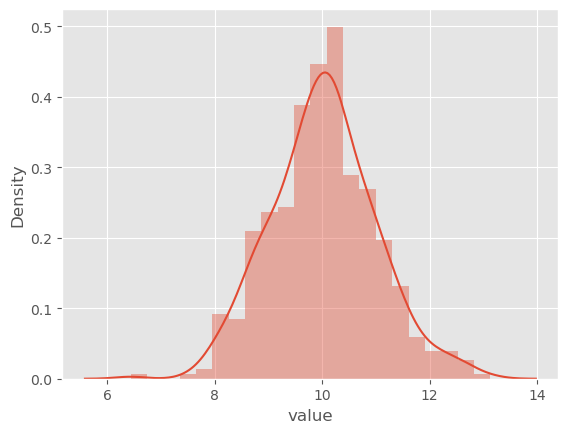

In [24]:
sns.distplot(control.value)

<Axes: xlabel='value', ylabel='Density'>

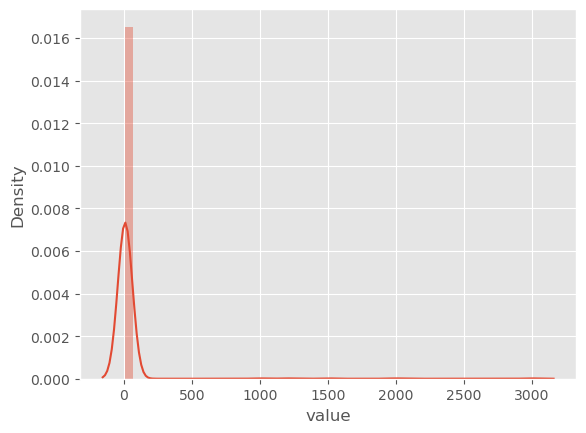

In [32]:
sns.distplot(treat.value)

### Применим bootstrap mean

Доверительные интервалы не пересекаются, значения средних сильно отличаются

In [39]:
bootstrap((treat.value, ),np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=15.958133063468445, high=53.189983482507), bootstrap_distribution=array([19.30881008, 26.70958003, 22.98262882, ..., 28.7598745 ,
       25.90024682, 37.8377144 ]), standard_error=8.373623906480713)

In [41]:
bootstrap((control.value, ),np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=9.9421809161867, high=10.113189736227982), bootstrap_distribution=array([10.03363485, 10.05054059, 10.0323662 , ..., 10.05498831,
       10.02207257, 10.05863136]), standard_error=0.04366624135851915)

In [54]:
compute_bootci(control.value, func = 'mean')

array([ 9.94, 10.11])

In [60]:
compute_bootci(treat.value, func = 'mean')

array([14.8 , 46.87])

### Применим bootstrap median

Доверительный интервал практически идентичен, медианы не отличаются

In [62]:
bootstrap((treat.value, ),np.median)

BootstrapResult(confidence_interval=ConfidenceInterval(low=9.932260575866824, high=10.1170586779806), bootstrap_distribution=array([10.05221579, 10.06067593, 10.09194821, ..., 10.03445051,
       10.00818546, 10.05688911]), standard_error=0.045335386979762984)

In [64]:
bootstrap((control.value, ),np.median)

BootstrapResult(confidence_interval=ConfidenceInterval(low=9.92503787937038, high=10.11350947752885), bootstrap_distribution=array([10.01021175, 10.11705868, 10.01578014, ...,  9.96433692,
       10.0428465 , 10.04882517]), standard_error=0.04576227323081713)

### Сравниваем тестовую и контрольную группы с помощью U-критерия Манна-Уитни

Значение p-value > 0.05 говорит об отсутствии статистически значимых различий между контрольной и тестовой группами (значение U-критерия больше, чем пороговое). Мы не имеем оснований отвергнуть нулевую гипотезу, то есть группы не отличаются.

In [69]:
sps.mannwhitneyu(control.value, treat.value)

MannwhitneyuResult(statistic=124189.5, pvalue=0.8592148582485579)

### Общие выводы, сравнение методов

Можно заметить, что контрольная и тестовая группы имеют разные значения только у последних 5 наблюдений:

In [98]:
treat.value.reset_index() - control.value.reset_index()

,index,value
0,500,0.000000
1,500,0.000000
2,500,0.000000
3,500,0.000000
4,500,0.000000
...,...,...
495,500,989.026071
496,500,1189.738926
497,500,1491.219910
498,500,1988.830922


Причем эти различия являются выбросами. Поэтому тест по среднему показывает значимые различия. <br>
Медиана устойчива к выбросам, поэтому бутстрап показал, что выборки не отличаются <br>
Критерий Манна-Уитни так же устойчив к выбросам и шумам в данных, поэтому показал, что выборки не отличаются